In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

delivery_time = pd.read_csv("C:/Users/Swetha/Downloads/delivery_time.csv")

In [3]:
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
delivery_time.rename(columns = {"Delivery Time" : "Delivery_Time", "Sorting Time" : "Sorting_Time"}, inplace = True)

In [6]:
delivery_time.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
delivery_time.shape

(21, 2)

In [8]:
delivery_time.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [10]:
delivery_time.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


array([[<AxesSubplot:title={'center':'Delivery_Time'}>,
        <AxesSubplot:title={'center':'Sorting_Time'}>]], dtype=object)

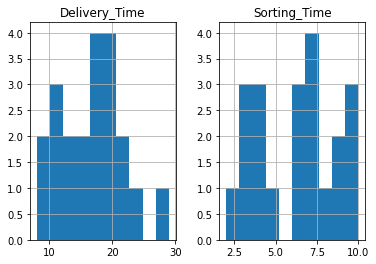

In [11]:
delivery_time.hist()

<AxesSubplot:>

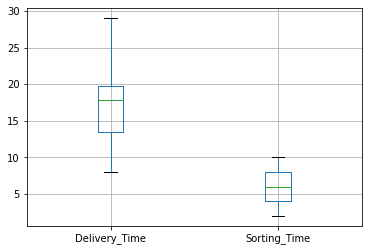

In [12]:
delivery_time.boxplot()

C:\Users\Swetha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


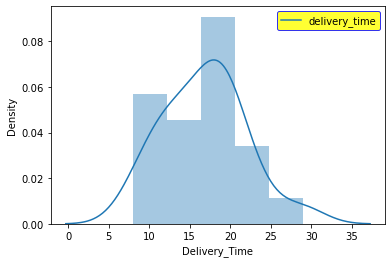

In [13]:
sns.distplot(delivery_time['Delivery_Time'])
plt.legend(['delivery_time'], loc = 'upper right', facecolor = 'yellow', edgecolor = 'blue')

C:\Users\Swetha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


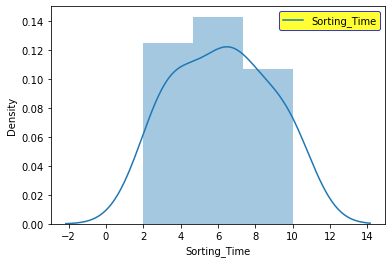

In [14]:
sns.distplot(delivery_time['Sorting_Time'])
plt.legend(['Sorting_Time'], loc = 'upper right', facecolor = 'yellow', edgecolor = 'Blue')

C:\Users\Swetha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


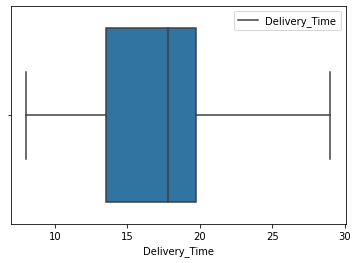

In [15]:
sns.boxplot(delivery_time['Delivery_Time'])
plt.legend(['Delivery_Time'])

C:\Users\Swetha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


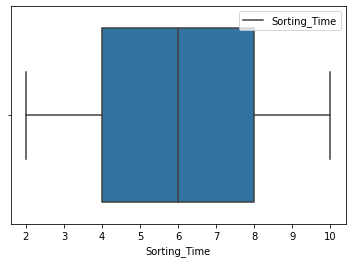

In [16]:
sns.boxplot(delivery_time['Sorting_Time'])
plt.legend(['Sorting_Time'])

In [17]:
##No outliers present in Delivery_Time and Sorting_Time

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

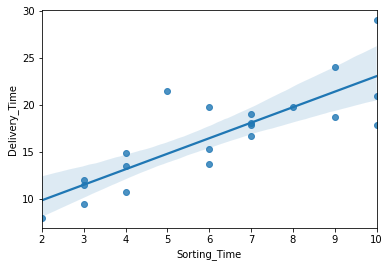

In [18]:
sns.regplot(x= 'Sorting_Time' , y = 'Delivery_Time', data = delivery_time)

In [19]:
model_1 = smf.ols('Delivery_Time ~ Sorting_Time',data = delivery_time).fit() 
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           3.98e-06
Time:                        15:52:03   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pred_data = model_1.predict(delivery_time['Sorting_Time'])
from ml_metrics import mse
rmse_1 = np.sqrt(mse(delivery_time['Delivery_Time'],pred_data))
print("RMSE of first model is: ",rmse_1)

RMSE of first model is:  2.7916503270617654


In [21]:
model_1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [22]:
print(model_1.tvalues, '\n', model_1.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [23]:
(model_1.rsquared, model_1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [24]:
from sklearn.preprocessing import StandardScaler
array_delivery_time = delivery_time.values
standard_delivery_time = StandardScaler().fit(array_delivery_time).transform(array_delivery_time)
standard_delivery_time[0:5]

array([[ 0.84986692,  1.53562462],
       [-0.66449036, -0.88298415],
       [ 0.59747404, -0.07678123],
       [ 1.45560983,  1.13252315],
       [ 2.46518134,  1.53562462]])

In [86]:
import statsmodels.api as sm
X = standard_delivery_time[:,1]
Y = standard_delivery_time[:,0]
model_2 = sm.OLS(Y,X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                              42.95
Date:                Tue, 28 Sep 2021   Prob (F-statistic):                    2.19e-06
Time:                        20:32:05   Log-Likelihood:                         -17.759
No. Observations:                  21   AIC:                                      37.52
Df Residuals:                      20   BIC:                                      38.56
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8260      0.126      6.553      0.000       0.563       1.089
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
pred_2 = model_2.predict(X)
rmse_2 = np.sqrt(mse(Y,pred_2))
print("rmse value for 2: ", rmse_2)

rmse value for 2:  0.5636741302900788


In [88]:
delivery_time_2 = delivery_time.copy()
delivery_time_2['log_DeliveryTime'] = np.log(delivery_time_2['Delivery_Time'])
delivery_time_2.head()

,Delivery_Time,Sorting_Time,log_DeliveryTime
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296


In [89]:
delivery_time_2['Sorting_Time'].corr(delivery_time_2['log_DeliveryTime'])

0.8431772637224149

In [90]:
model_3 = smf.ols('log_DeliveryTime~Sorting_Time', data = delivery_time_2).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_DeliveryTime   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           1.59e-06
Time:                        20:32:08   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
pred_3 = model_3.predict(delivery_time_2['Sorting_Time'])
rmse_3 = np.sqrt(mse(delivery_time_2['log_DeliveryTime'],pred_3 ))
print("RMSE value of 3: ",rmse_3 )

RMSE value of 3:  0.16696276106302863


In [92]:
from sklearn.preprocessing import MinMaxScaler
array_delivery_time = delivery_time.values
norm_delivery_time = MinMaxScaler().fit(array_delivery_time).transform(array_delivery_time)
norm_delivery_time[0:5]


array([[0.61904762, 1.        ],
       [0.26190476, 0.25      ],
       [0.55952381, 0.5       ],
       [0.76190476, 0.875     ],
       [1.        , 1.        ]])

In [97]:
X = norm_delivery_time[:,1]
Y = norm_delivery_time[:,0]
model_4 = sm.OLS(Y,X).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              213.7
Date:                Tue, 28 Sep 2021   Prob (F-statistic):                    3.86e-12
Time:                        21:14:48   Log-Likelihood:                          11.409
No. Observations:                  21   AIC:                                     -20.82
Df Residuals:                      20   BIC:                                     -19.77
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7548      0.052     14.620      0.000       0.647       0.863
==============================================================================
Omnibus:                        1.543   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                0.423
Skew:                           0.259   Prob(JB):                        0.809
Kurtosis:                       3.465   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
pred_4 = model_4.predict(X)
rmse_4 = np.sqrt(mse(Y,pred_4))
print("RMSE for 4th model is: ", rmse_4)

RMSE for 4th model is:  0.14054714818280667


In [102]:
result_delivery_time = pd.DataFrame({'models': ["Raw data", "Standardization", "Transformation on Y", "Normalization"],'R values':['0.682', '0.682', '0.711', '0.914'], 'RMSE':['2.7916503270617654', '0.5636741302900788', '0.16696276106302863','0.14054714818280667']})

In [103]:
result_delivery_time

,models,R values,RMSE
0,Raw data,0.682,2.7916503270617654
1,Standardization,0.682,0.5636741302900788
2,Transformation on Y,0.711,0.16696276106302863
3,Normalization,0.914,0.14054714818280667
